# Analyze seedcheck
Study the analysis of the seeds after processing by the stage "seedcheck"

In [1]:
%matplotlib inline
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_monthly/month01'))
from uw.like2.analyze import (seedcheck,)
map(reload, ( seedcheck, ));

In [2]:
self = seedcheck.SeedCheck()

No associations found: running the standard logic
Note: making bzcat first if second
<p>Read in 328 sources from file seedcheck.zip: <br>selection cut:
                    (self.df.ts>6)*(self.df.r95<0.6)*(self.df.locqual<8) : 30 remain


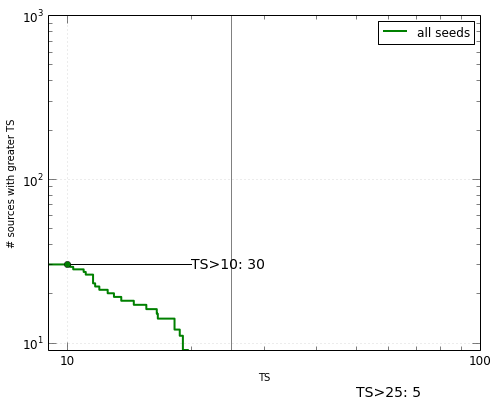

In [3]:
self.seed_cumulative_ts();

In [ ]:
debug

In [ ]:
p n

In [33]:
self.df[self.df.acat=='bzcat']['aname aprob'.split()].sort_index(by='aname')

,aname,aprob
name,,
Sh10-1164,5BZBJ0244-5819,0.9647639
Sh10-1080,5BZBJ0430-2507,0.9006906
Sh10-121,5BZBJ1057-0059,0.9342598
Sh10-006,5BZBJ1215+3508,0.9033101
Sh10-122,5BZBJ1231+6414,0.4259017
Sh10-019,5BZBJ1238+4431,0.7665401
Sh10-059,5BZBJ1351+5542,0.003434203
Sh10-408,5BZBJ1744-0518,0.8143123
Sh10-1246,5BZGJ0012-1628,0.9869261


In [10]:
ta=self.assoc[self.assoc.aprob>0.8]; #t['aprob acat aname adelta_ts'.split()]

In [11]:
bznames = np.array(ta.aname[ta.acat=='bzcat'])
bztypes = set([name[3] for name in bznames])
td = dict()       
for t in bztypes:
    td[t]= 0
for n in bznames:
    t = n[3]
    td[t] +=1
pd.DataFrame(td.items(), columns='type count'.split()).to_html(index=False)
    

u'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th>type</th>\n      <th>count</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <td> Q</td>\n      <td> 14</td>\n    </tr>\n    <tr>\n      <td> B</td>\n      <td>  5</td>\n    </tr>\n    <tr>\n      <td> U</td>\n      <td>  3</td>\n    </tr>\n    <tr>\n      <td> G</td>\n      <td>  2</td>\n    </tr>\n  </tbody>\n</table>'

In [12]:
bztypes, bznames

({'B', 'G', 'Q', 'U'},
 array(['5BZQJ1224+2122', '5BZBJ1215+3508', '5BZQJ1256-0547',
        '5BZQJ1332-0509', '5BZBJ0430-2507', '5BZGJ2239-0631',
        '5BZBJ0244-5819', '5BZBJ1057-0059', '5BZQJ2348-1631',
        '5BZGJ0012-1628', '5BZUJ1048+7143', '5BZUJ0849+5108',
        '5BZQJ1246-2547', '5BZQJ1652+6232', '5BZQJ0819+3226',
        '5BZQJ1756+5748', '5BZQJ1037-2934', '5BZQJ1427-4206',
        '5BZUJ1626-2951', '5BZBJ1744-0518', '5BZQJ2050+3127',
        '5BZQJ0941-8615', '5BZQJ0501-0159', '5BZQJ0137+3122'], dtype=object))

In [13]:
len(bznames)

24

In [49]:
t['bprob'] = [x['prob'][1] if len(x['prob'])>1 else 0 for x in t.adict]
t['bcat'] = [(x['cat'][1] if len(x['prob'])>1 else '') for x in t.adict]

In [50]:
t['aprob bprob acat bcat'.split()]

,aprob,bprob,acat,bcat
name,,,,
Sh10-000,0.994956,0.981550,bzcat,crates
Sh10-006,0.9033101,0.850679,bzcat,crates
Sh10-023,0.8576047,0.062608,crates,qso
Sh10-079,0.9976575,0.997658,bzcat,bzcat
Sh10-094,0.9428674,0.942867,bzcat,bzcat
Sh10-1048,0.8697462,0.032189,crates,crates_fom
Sh10-1080,0.9006906,0.630136,bzcat,crates
Sh10-1129,0.9063166,0.048164,crates,crates_fom
Sh10-1143,0.9815616,0.365053,bllac,qso


In [71]:
t=pd.DataFrame(self.assoc_sum,columns='catalog count'.split(),).sort_index(by='catalog')
t.index = t.catalog; t.to_html(index=False)

u'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th>catalog</th>\n      <th>count</th>\n    </tr>\n    <tr>\n      <th>catalog</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <td>        agn</td>\n      <td>  1</td>\n    </tr>\n    <tr>\n      <td>      bllac</td>\n      <td>  1</td>\n    </tr>\n    <tr>\n      <td>      bzcat</td>\n      <td> 24</td>\n    </tr>\n    <tr>\n      <td>     crates</td>\n      <td>  8</td>\n    </tr>\n    <tr>\n      <td> pulsar_lat</td>\n      <td>  1</td>\n    </tr>\n    <tr>\n      <td>        qso</td>\n      <td>  1</td>\n    </tr>\n  </tbody>\n</table>'

In [70]:
t.to_html?